# Chapter 3 > Exercise 10

<b>This question should be answered using the Carseats data set.</b><br>
(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.<br>
(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!<br>
(c) Write out the model in equation form, being careful to handle the qualitative variables properly.<br>
(d) For which of the predictors can you reject the null hypothesis H0 : βj =0?<br>
(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.<br>
(f) How well do the models in (a) and (e) fit the data?<br>
(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).<br>
(h) Is there evidence of outliers or high leverage observations in the model from (e)?

In [3]:
library(carData)
library(car)
library(ISLR)

In [23]:
attach(Carseats)
Carseats[1:5,]

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

<b>(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.</b>

In [7]:
lmodel = lm(Sales~Price+Urban+US, data=Carseats)
summary(lmodel)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


<b>(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!</b><br>
> <font color="green">
    Price and US variable seems to have good relation with response variable as their p-value is statistically significant.<br>
    But Urban seems to have no relation with response as its p-value is very high, means Null hypothesis should be accepted.
    </font>

<b>(c) Write out the model in equation form, being careful to handle the qualitative variables properly.</b><br>
> <font color="green">
    This is model equation:<br> 
    Sales = 13.04 - 0.054 * Price - 0.022 * UrbanYes + 1.2 * USYes <br>
    If Urban == Yes and US == Yes:<br>
    Sales = 14.22 - 0.054 * Price <br>
    If Urban == No and US == Yes:<br>
    Sales = 14.24 - 0.054 * Price <br>
    If Urban == Yes and US == No:<br>
    Sales = 13.2 - 0.054 * Price <br>    
    If Urban == No and US == No:<br>    
    Sales = 13.04 - 0.054 * Price <br>
    Comment:
    From the plot, it is clear that there is a significant difference in line intercept between US=Yes and US=No. But not difference in Urban Yes & No.
    </font>

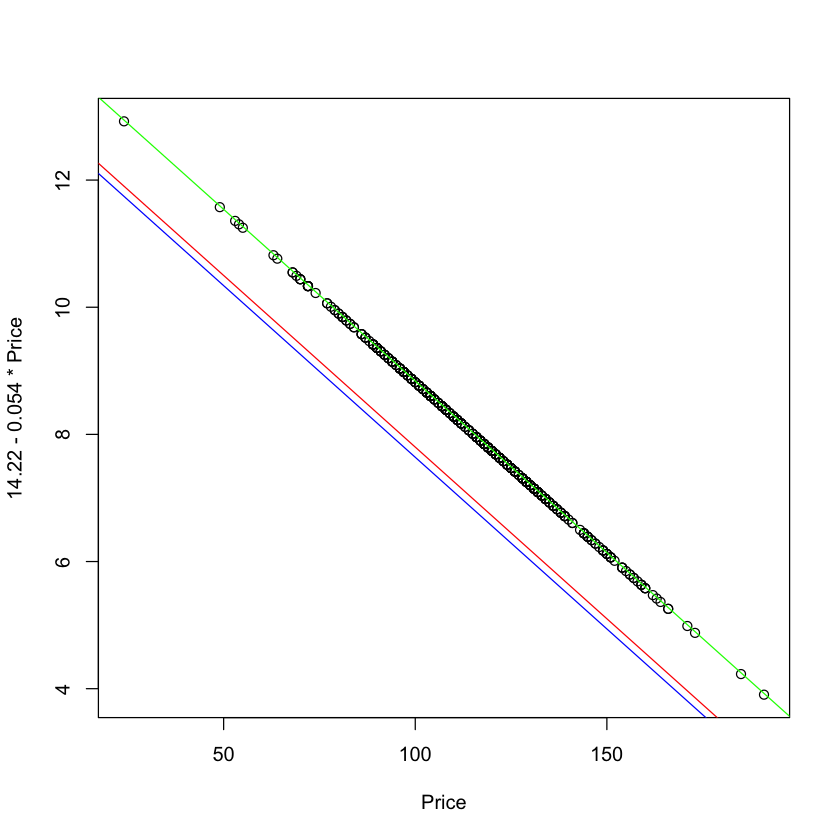

In [24]:
plot(Price, 14.22 - 0.054 * Price)
abline(14.24, -0.054, col="green")

abline(13.2, -0.054, col="red")
abline(13.04, -0.054, col="blue")

<b>(d) For which of the predictors can you reject the null hypothesis H0 : βj =0?</b>
> <font color="green">
    Comment: Null hypothesis can be rejected for Price and US varriable due to very low p-value.
    </font>

<b>(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.</b>

In [22]:
lmodel = lm(Sales~Price+US, data=Carseats)
summary(lmodel)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


<b>(f) How well do the models in (a) and (e) fit the data?</b><br>
> <font color="green">
    Comment: RSE is still the same 2.47, no improvement seen.
    </font>

<b>(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).</b><br>

In [39]:
"95% CI for Price coeff:"
-0.054 - 2*0.0052
-0.054 + 2*0.0052
"95% CI for US coeff:"
1.2 - 2*0.0052
1.2 + 2*0.0052

[1] "95% CI for Price coeff:"

[1] -0.0644

[1] -0.0436

[1] "95% CI for US coeff:"

[1] 1.1896

[1] 1.2104

<b>(h) Is there evidence of outliers or high leverage observations in the model from (e)?</b><br>
> <font color="green">
    Comment: Outliers or high leverage not observed in diagnotic plots.
    </font>

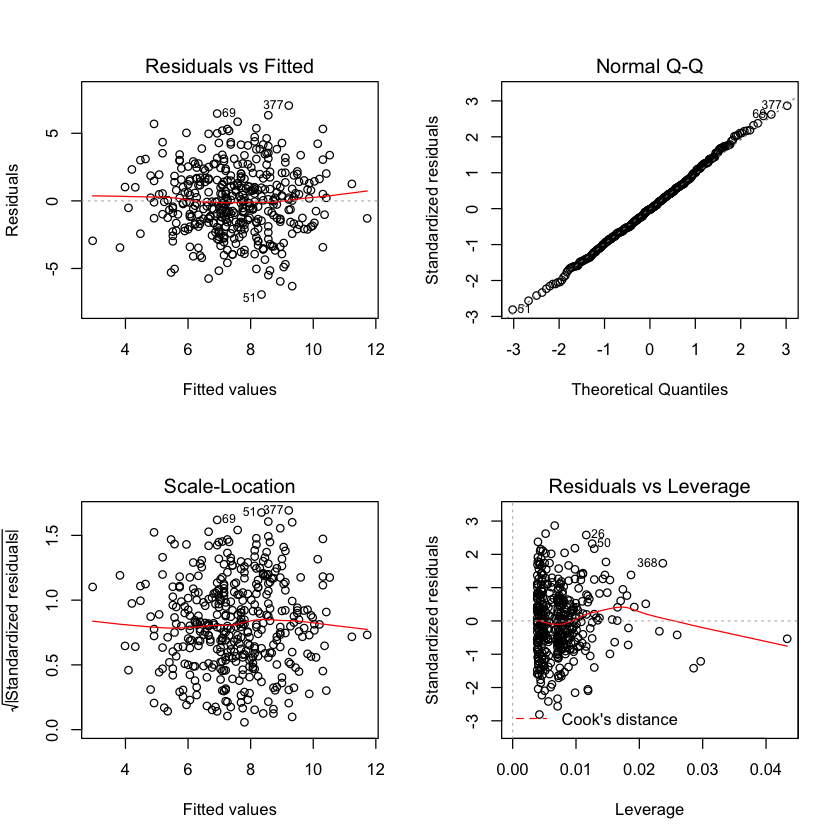

In [44]:
par(mfrow=c(2,2))
plot(lmodel)